## Import Required Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load and Prepare Dataset

In [9]:
data = pd.read_csv("C:\\Users\\patgi\\OneDrive\\Desktop\\titanic[1]\\breast_cancer.csv")
print(data.head())
print(data.shape)

#Standardize the data
X = data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

## Apply PCA

In [10]:
pca = PCA(n_components=6)
pca.fit(X_scaled)

PCA(n_components=6)

## Display Eigen Values and Eigen Vectors

In [11]:
print("Eigenvalues")
print(pca.explained_variance_)
print()
print('Eigenvectors')
print(pca.components_)

Eigenvalues
[13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224]

Eigenvectors
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060884e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653629e-02 -3.47675004e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672982e-02 -1.99878428e-01 -2.19351858e-01
   1.72

## Create Dataframe with Transformed Data

In [12]:
transformed_df = pd.DataFrame(pca.transform(X_scaled), columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
transformed_df.to_csv("breast_cancer_transformed.csv", index=False)
transformed_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495
...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936


## Plot the Scree Plot

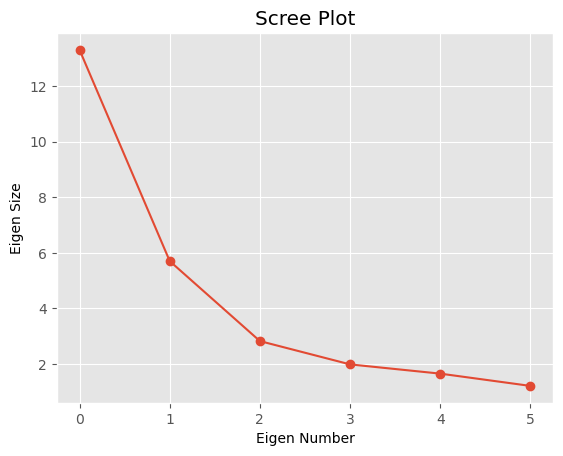

In [13]:
plt.style.use("ggplot")
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigen Number")
plt.ylabel("Eigen Size")
plt.title("Scree Plot")
plt.show()